<a href="https://colab.research.google.com/github/robd123/AML/blob/main/CV/fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from time import time

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from datetime import datetime

In [ ]:
which = 3
out_file = 'numbers'
print( 'input data: ', out_file )
class_names = [ '0', '1', '2', '3', '4', '5', '6', '7', '8', '9' ]
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
channels = 1  #gray=1; rgb=3

input data:  numbers
11493376/11490434 [==============================] - 0s 0us/step


first 25 training images (as gray data)


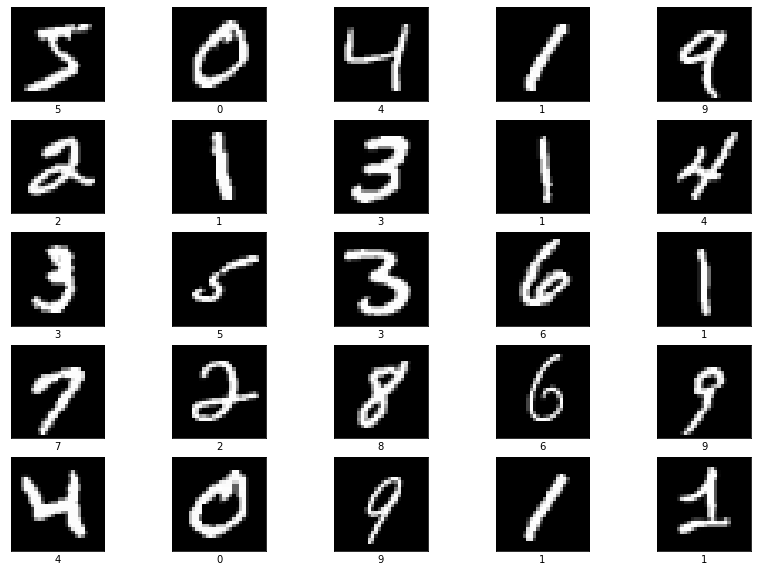

In [ ]:
print( 'first 25 training images (as gray data)' )
plt.figure( figsize=(14, 10), num='first 25 training images' )
plt.title( 'first 25 training images (shown as gray data' )
for i in range( 25 ):
    plt.subplot( 5, 5, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( train_images[i], cmap=plt.cm.gray, interpolation='nearest' )
    plt.xlabel( class_names[int(train_labels[i])] )
plt.show()

[  0   0   0   0   0   0 164 253 253 253 253 253 253 255 253 253 253 253
 253 253  99   0   0   0   0   0   0   0]


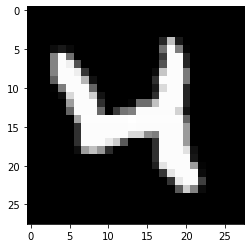

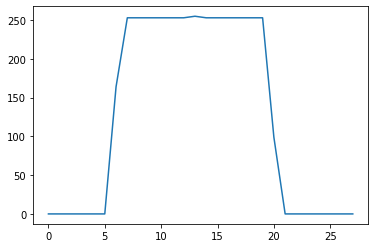

[  0   0   0   0   0   0   0   0   0   0   0   0 169 254 253 169   0   0
   0   0   0   0   0   0   0   0   0   0]


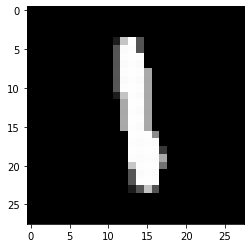

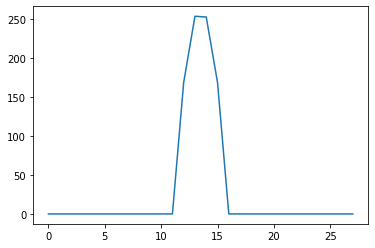

In [ ]:
if channels == 1:  # 1 == gray
    i = 20  #image 20
    rows = len( train_images[i] )
    line = train_images[i][rows//2]
    print( line )
    plt.imshow( train_images[i], cmap=plt.cm.gray, interpolation='nearest' )
    plt.show()
    plt.plot( line )
    plt.show()

    i = 200  #image 200
    rows = len( train_images[i] )
    line = train_images[i][rows//2]
    print( line )
    plt.imshow( train_images[i], cmap=plt.cm.gray, interpolation='nearest' )
    plt.show()
    plt.plot( line )
    plt.show()

first 25 training images (as binary data)


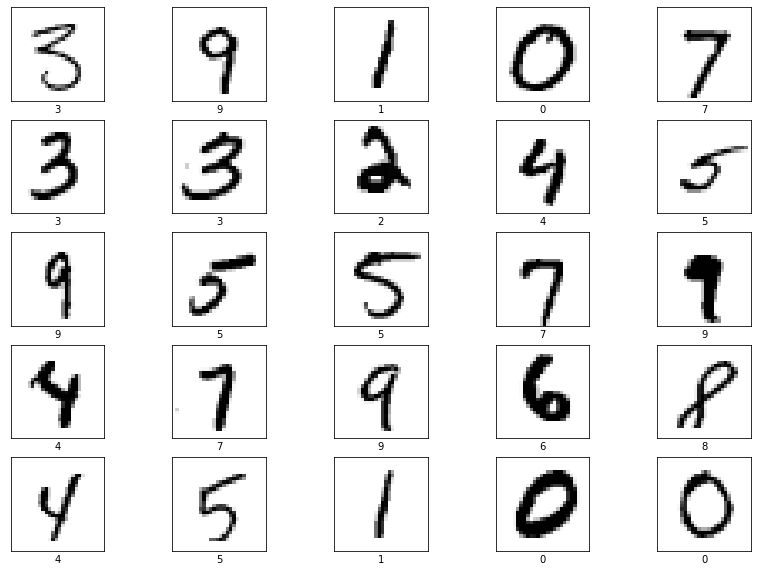

In [ ]:
#show first 25 training images (as binary data)
print( 'first 25 training images (as binary data)' )
plt.figure( figsize=(14, 10), num='first 25 training images' )
plt.title( 'first 25 training images (shown as binary data' )
for i in range( 25 ):
    plt.subplot( 5, 5, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( train_images[i], cmap=plt.cm.binary, interpolation='nearest' )
    plt.xlabel( class_names[int(train_labels[i])] )
plt.show()


**TODO #1 - Use a Randomized 80/20 Split for Training and Test Data**

In [ ]:
X = np.concatenate((train_images, test_images), axis = 0)
Y = np.concatenate((train_labels, test_labels), axis = 0)

print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

#Keep these since they are used later.  Reassign them to the new randomly split data
train_images = x_train
train_labels = y_train
test_images = x_test
test_labels = y_test

print( "# of training images and their size:", train_images.shape       )
print( "# of training labels and their size:", train_labels.shape, "\n" )

print( "# of testing images and their size:",  test_images.shape        )
print( "# of testing labels and their size:",  test_labels.shape        )

(70000, 28, 28)
(70000,)
# of training images and their size: (56000, 28, 28)
# of training labels and their size: (56000,) 

# of testing images and their size: (14000, 28, 28)
# of testing labels and their size: (14000,)


[1348. 1574. 1444. 1417. 1350. 1232. 1393. 1379. 1437. 1426.]


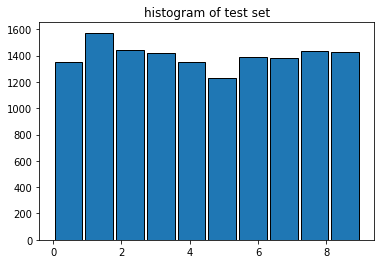

In [ ]:
plt.title( 'histogram of test set' )
out = plt.hist( test_labels, ec='black', rwidth=0.9 )
print( out[0] )


[5555 6303 5546 5724 5474 5081 5483 5914 5388 5532]


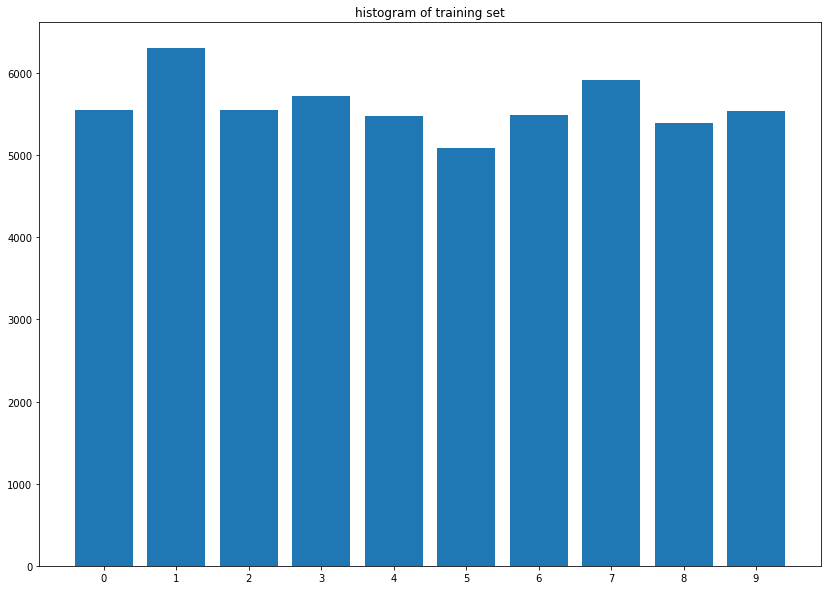

In [ ]:
h = np.histogram( train_labels, len(class_names) )[0]
print( h )
plt.figure( figsize=(14,10) )
plt.title( 'histogram of training set' )
plt.bar( class_names, h )
plt.show()

[1348 1574 1444 1417 1350 1232 1393 1379 1437 1426]


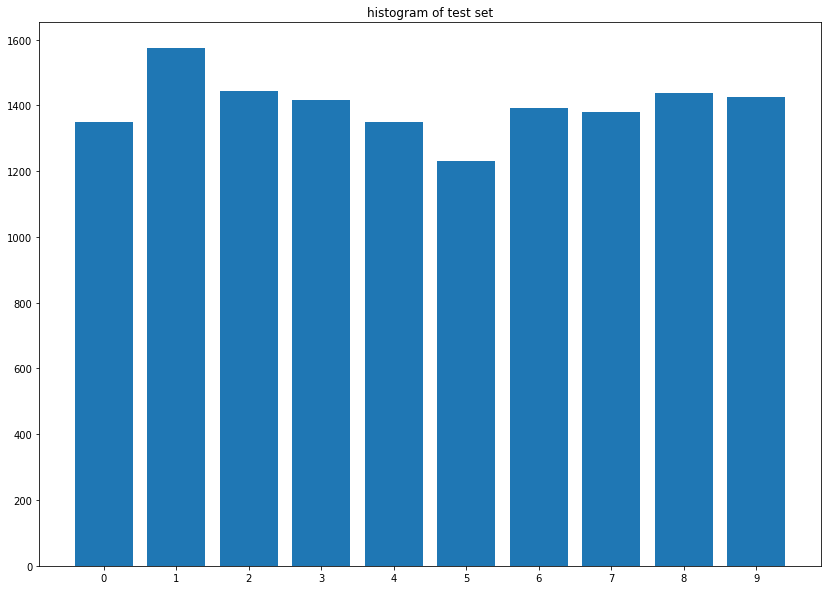

In [ ]:
h = np.histogram( test_labels, len(class_names) )[0]
print( h )
plt.figure( figsize=(14,10) )
plt.title( 'histogram of test set' )
plt.bar( class_names, h )
plt.show()


In [ ]:
img_rows    = x_train.shape[1]
img_cols    = x_train.shape[2]
input_shape = (img_rows, img_cols, channels)    #channels = 1 for gray (3 for color/rgb)

t1 = np.min( x_train )
t2 = np.min( x_test )
mn = np.min( [t1, t2] )

t1 = np.max( x_train )
t2 = np.max( x_test )
mx = np.min( [t1, t2] )

print( 'rows =', img_rows )
print( 'cols =', img_cols )
print( 'channels =', channels, '\n' )
print( 'min =', mn )
print( 'max =', mx )

rows = 28
cols = 28
channels = 1 

min = 0
max = 255


In [ ]:
print( '# of training images: ', len(x_train) )
print( 'shape before: ', x_train.shape )

#prep training images
x_train = x_train.reshape( x_train.shape[0], img_rows, img_cols, channels )
x_train = x_train.astype( 'float32' )

assert mx == 255, "check range of data values"
x_train /= 255.0  #normalize

print( 'shape after: ', x_train.shape )

"""### prep testing"""

print( '# of testing images: ', len(x_test) )
print( 'shape before: ', x_test.shape )


# of training images:  56000
shape before:  (56000, 28, 28)
shape after:  (56000, 28, 28, 1)
# of testing images:  14000
shape before:  (14000, 28, 28)


In [ ]:
#prep testing images
x_test = x_test.reshape( x_test.shape[0], img_rows, img_cols, channels )
x_test = x_test.astype( 'float32' )
assert mx == 255, "check range of data values"
x_test /= 255.0  #normalize

In [ ]:
print( 'create new model' )
print( 'input shape: ', input_shape )
model = keras.Sequential()
model.add( keras.layers.Flatten( input_shape=input_shape ) )
model.add( keras.layers.Dense( 128,              activation='relu'    ) )
model.add( keras.layers.Dense( len(class_names), activation='softmax' ) )
model.compile( optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] )

model.summary()

create new model
input shape:  (28, 28, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


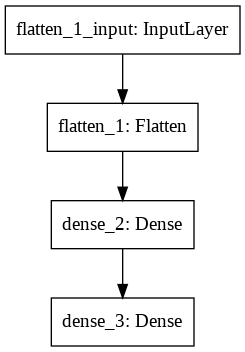

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96 )


In [ ]:
print( '\ntesting all test images (before any training) ...' )
test_loss, test_acc = model.evaluate( x_test, y_test )
print( "loss=" + str(test_loss) + ", test acc=" + str(test_acc) + "\n" )

# Define the Keras TensorBoard callback.
logdir = "logs/fit/" + datetime.now().strftime( "%Y%m%d-%H%M%S" )
tensorboard_callback = keras.callbacks.TensorBoard( log_dir=logdir )


testing all test images (before any training) ...
438/438 [==============================] - 1s 2ms/step - loss: 2.3579 - accuracy: 0.1175
loss=2.3499324321746826, test acc=0.1192857176065445



**TODO #2 - Train Model, Use Test Data for Validation**

---
Validation data does not affect the training of the model, it just provides metrics, so the test set can be used for validation.


In [ ]:
print( "training ... \n" )
ep = 100
start = time()
h = model.fit( x_train, y_train, epochs=ep, callbacks=[tensorboard_callback],  validation_data=(x_test, y_test))
elapsed_training_time = time() - start

training ... 

Epoch 1/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.2593 - accuracy: 0.9247 - val_loss: 0.1544 - val_accuracy: 0.9555
Epoch 2/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.1134 - accuracy: 0.9663 - val_loss: 0.1130 - val_accuracy: 0.9657
Epoch 3/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0779 - accuracy: 0.9749 - val_loss: 0.0941 - val_accuracy: 0.9721
Epoch 4/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0569 - accuracy: 0.9829 - val_loss: 0.0944 - val_accuracy: 0.9704
Epoch 5/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0435 - accuracy: 0.9864 - val_loss: 0.0891 - val_accuracy: 0.9737
Epoch 6/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0335 - accuracy: 0.9898 - val_loss: 0.0815 - val_accuracy: 0.9771
Epoch 7/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0273 - accuracy: 0.9916 - val_loss: 

In [ ]:
model.save('digits_shallow.h5')

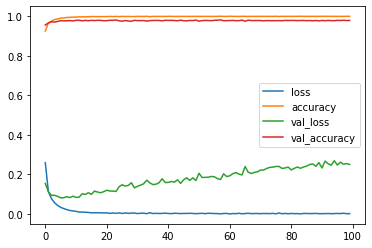

In [ ]:
pd.DataFrame(model.history.history).plot()

In [ ]:
print(elapsed_training_time)

376.2747275829315


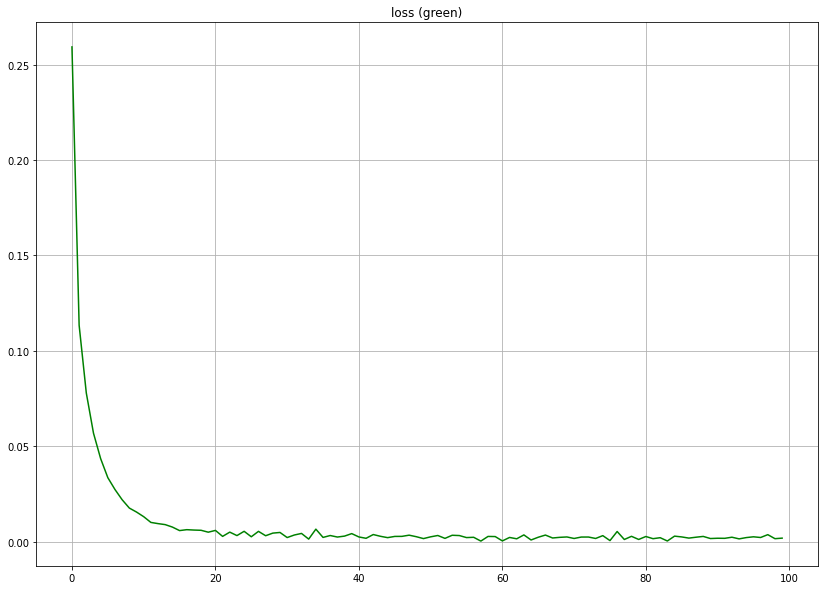

loss: [0.2592562735080719, 0.11337580531835556, 0.07788314670324326, 0.05686376616358757, 0.043484166264534, 0.033524040132761, 0.027295192703604698, 0.02193782851099968, 0.017587672919034958, 0.015506905503571033, 0.01307728048413992, 0.010075343772768974, 0.009443693794310093, 0.008917405270040035, 0.0076354919001460075, 0.00579029368236661, 0.006268850527703762, 0.006070342380553484, 0.005945345852524042, 0.004953793250024319, 0.005880576092749834, 0.0027563509065657854, 0.0049821119755506516, 0.00317383068613708, 0.005412156693637371, 0.0025567077100276947, 0.005386327859014273, 0.003097192384302616, 0.004467076156288385, 0.004811712075024843, 0.0021423036232590675, 0.0034757566172629595, 0.0042999363504350185, 0.0013262423453852534, 0.00654030404984951, 0.0022158960346132517, 0.0032059655059129, 0.0024108169600367546, 0.00290135876275599, 0.004206545650959015, 0.0024536370765417814, 0.001748718204908073, 0.003717432264238596, 0.0028028562664985657, 0.0020947291050106287, 0.0027335

In [ ]:
#report and plot loss
plt.figure( figsize=(14,10) )
plt.grid();  plt.title( 'loss (green)' );       
plt.plot( h.history['loss'],     'g' ); 
plt.show()
print( "loss:", h.history["loss"] )

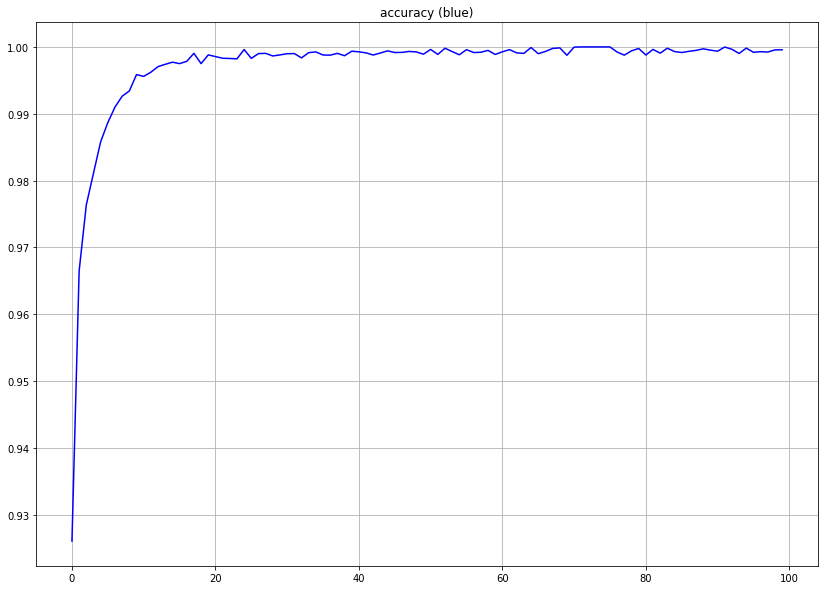

accuracy: [0.9260535836219788, 0.9664821624755859, 0.9763571619987488, 0.9811071157455444, 0.9858035445213318, 0.9886785745620728, 0.9909999966621399, 0.9926249980926514, 0.9934107065200806, 0.9958571195602417, 0.9955892562866211, 0.9962142705917358, 0.9970535635948181, 0.9973928332328796, 0.9977142810821533, 0.9975000023841858, 0.9978392720222473, 0.9990357160568237, 0.9975000023841858, 0.9988035559654236, 0.9985535740852356, 0.9983035922050476, 0.9982678294181824, 0.9982143044471741, 0.9996071457862854, 0.998285710811615, 0.9990000128746033, 0.9990357160568237, 0.9986428618431091, 0.9988035559654236, 0.9989821314811707, 0.9990000128746033, 0.9983571171760559, 0.9991428852081299, 0.9992499947547913, 0.9987857341766357, 0.9987678527832031, 0.9990357160568237, 0.9986785650253296, 0.9993571639060974, 0.9992678761482239, 0.9991071224212646, 0.9987857341766357, 0.9990893006324768, 0.9994106888771057, 0.9991607069969177, 0.9991785883903503, 0.9993214011192322, 0.9992499947547913, 0.99891072

In [ ]:
#report accuracy
plt.figure( figsize=(14,10) )
plt.grid();  plt.title( 'accuracy (blue)'   );
plt.plot( h.history['accuracy'], 'b' ); 
plt.show()
print( "accuracy:", h.history["accuracy"] )

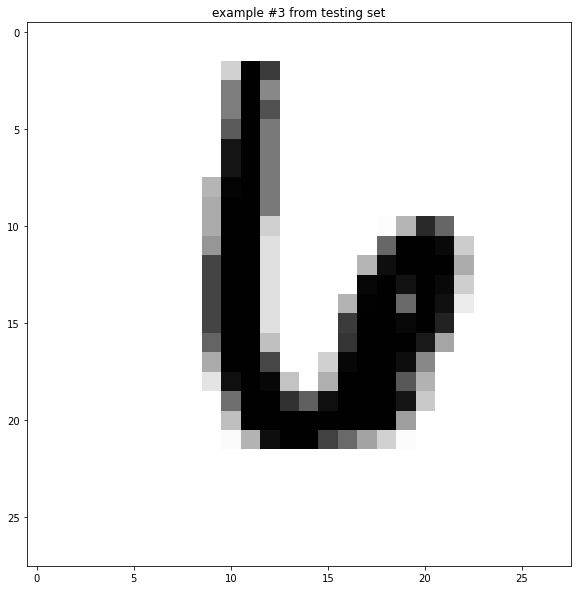

In [ ]:
# show a sample test image
plt.figure( figsize=(14,10) )
plt.title( 'example #' + str(which) + ' from testing set' )
plt.imshow( test_images[which], cmap=plt.cm.binary, interpolation='nearest' )
plt.grid( False )
plt.draw()
plt.show()

In [ ]:
#show sample prediction
print( 'actual class for test #', which, ':', test_labels[which], class_names[test_labels[which]] )
#get the image from the test dataset
img = x_test[ which ]
#add the image to a batch where it's the only member
img = ( np.expand_dims(img, 0) )
prediction = model.predict( img )
print( 'prediction vector for test image #' + str(which) + ':', prediction[0] )
print( 'subscript of maximal prediction:', np.argmax(prediction[0]), class_names[np.argmax(prediction[0])] )

actual class for test # 3 : 6 6
prediction vector for test image #3: [3.3074978e-26 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.3094947e-31
 0.0000000e+00 1.0000000e+00 4.0170546e-37 0.0000000e+00 0.0000000e+00]
subscript of maximal prediction: 6 6


# First Prediction

first 120 test images (errors in parens)


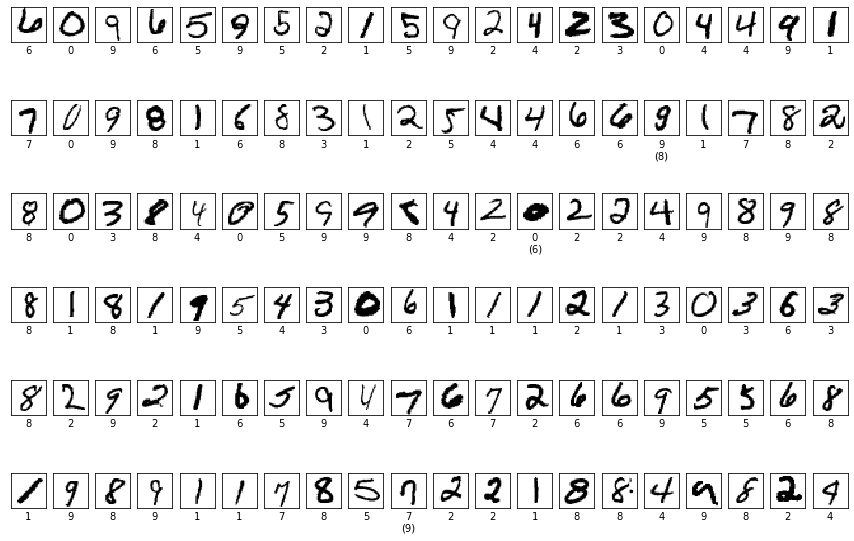

In [ ]:
#show first N=RxC test images
R =  6
C = 20
print( 'first ' + str(R*C) + ' test images (errors in parens)' )
plt.figure( figsize=(15, 10), num='first ' + str(R*C) + ' test images' )
plt.title( 'test images' )
for i in range( R*C ):
    img = x_test[i]
    img = ( np.expand_dims(img, 0) )
    prediction = model.predict( img )
    prediction = class_names[ np.argmax(prediction[0]) ]
    plt.subplot( R, C, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( test_images[i], cmap=plt.cm.binary, interpolation='nearest' )
    if class_names[int(test_labels[i])] == prediction:
        plt.xlabel( class_names[int(test_labels[i])] )
    else:
        plt.xlabel( class_names[int(test_labels[i])] + "\n(" + prediction + ")" )
plt.savefig( out_file+'-first120.png' )
plt.show()

[Text(159.0, 0.5, 'Actual'), Text(0.5, 69.0, 'Predicted')]

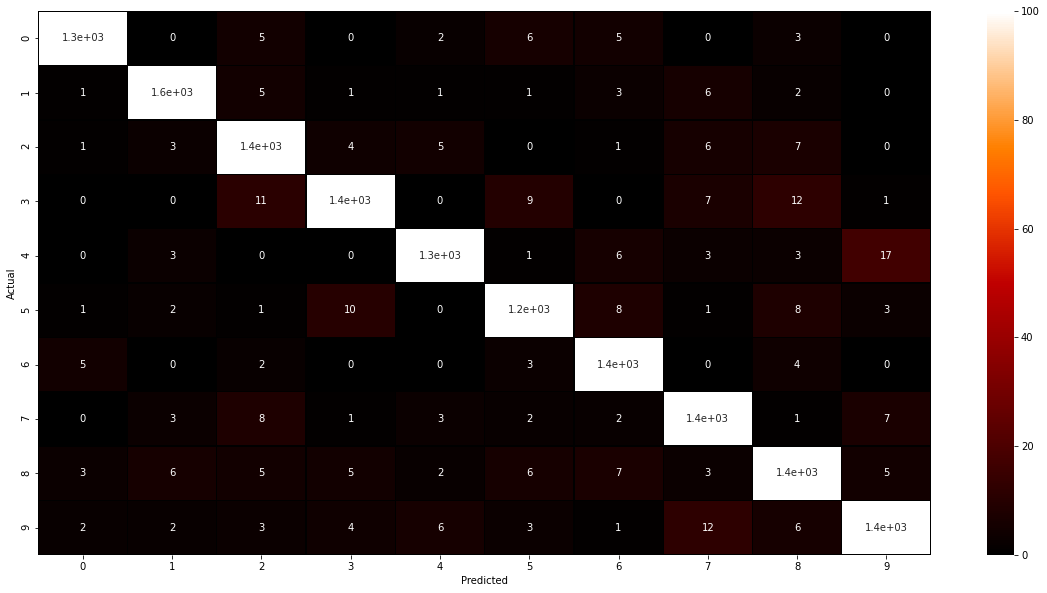

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(cm, cmap='gist_heat', annot=True, xticklabels=class_names, yticklabels=class_names, vmax=100, vmin=0, linewidths=.3, linecolor='black')
heatmap.set(xlabel="Predicted", ylabel = "Actual")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1348
           1       0.99      0.99      0.99      1574
           2       0.97      0.98      0.98      1444
           3       0.98      0.97      0.98      1417
           4       0.99      0.98      0.98      1350
           5       0.97      0.97      0.97      1232
           6       0.98      0.99      0.98      1393
           7       0.97      0.98      0.98      1379
           8       0.97      0.97      0.97      1437
           9       0.98      0.97      0.97      1426

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



**TODO ## - Create Lists of Good and Bad Predictions**

In [ ]:
bad = [y_pred[i] for i in range(len(y_pred)) if y_pred[i] != y_test[i]]
good = [y_pred[i] for i in range(len(y_pred)) if y_pred[i] == y_test[i]]
print(len(good))
print(len(bad))

13703
297


[13 19 40 25 19 31 33 38 46 33]


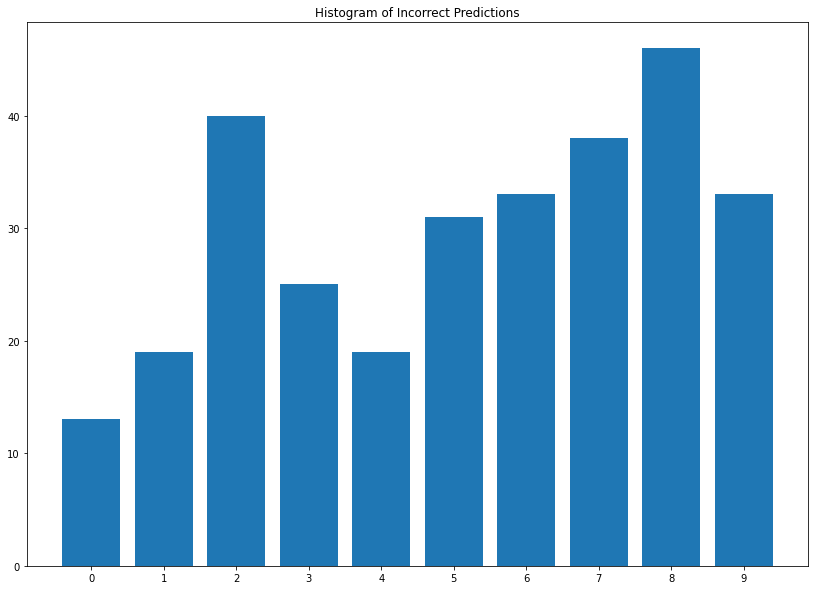

In [ ]:
h_bad = np.histogram( bad, len(class_names) )[0]
print( h_bad )
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Incorrect Predictions' )
plt.bar( class_names, h_bad )
plt.show()

[1327 1554 1417 1377 1317 1198 1379 1352 1395 1387]


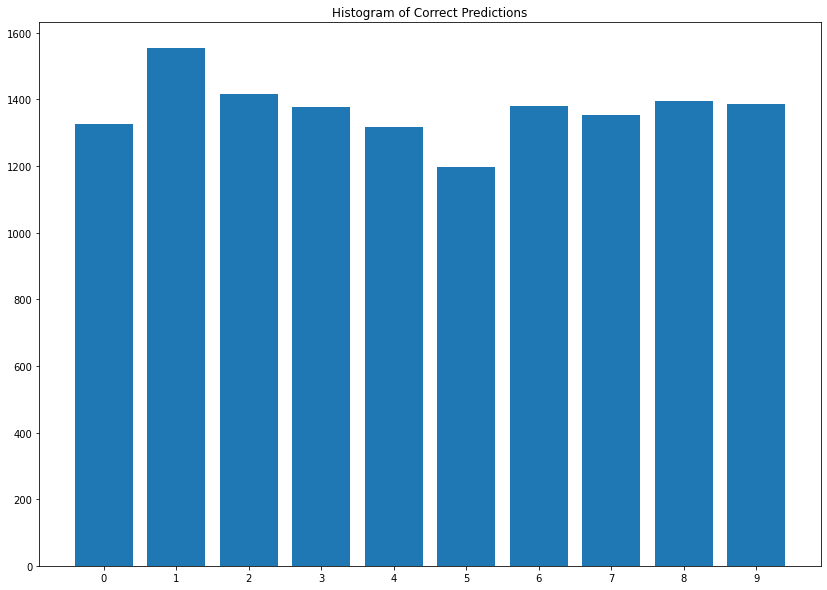

In [ ]:
h_good = np.histogram( good, len(class_names) )[0]
print( h_good )
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Correct Predictions' )
plt.bar( class_names, h_good )
plt.show()

[0.9701492537313433, 1.2078830260648443, 2.7453671928620453, 1.783166904422254, 1.4221556886227544, 2.5223759153783565, 2.3371104815864023, 2.7338129496402876, 3.1922276197085355, 2.323943661971831]


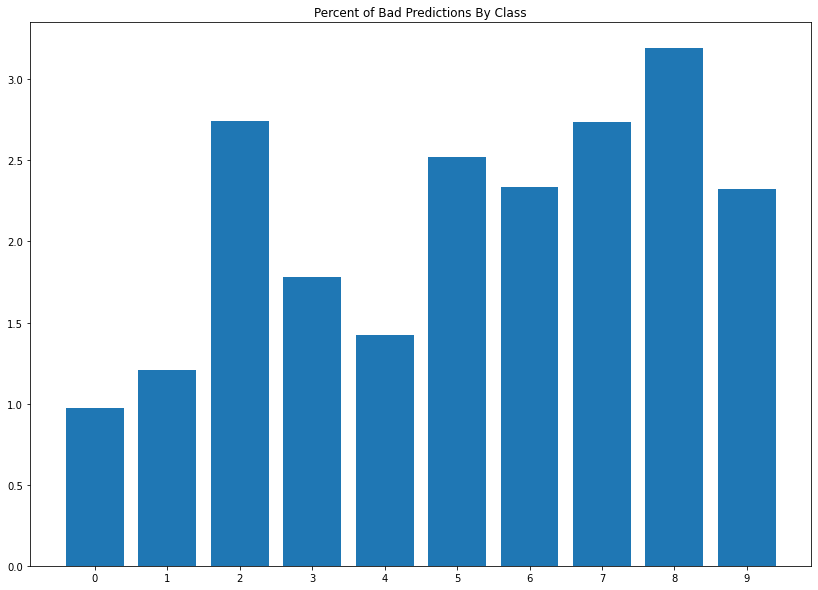

In [ ]:
pct_bad = [(h_bad[i]*100/(h_bad[i] +  h_good[i])) for i in range(len(h_good))]
print(pct_bad)
plt.figure( figsize=(14,10) )
plt.title( 'Percent of Bad Predictions By Class' )
plt.bar( class_names, pct_bad )
plt.show()

# Increase Noise

**TODO #4 - Create Noisy Test Data**

---

Create noisy test data. Noise is added 20 times iteratively, resulting in 21 sets of test data with increasing amounts of noise.  These sets will be represented as noise levels 0-20 with noise level 0 being the original noiseless test data.  

In [ ]:
np.random.seed(17)

zeroes = np.zeros((len(x_test), img_rows, img_cols, 1))
ones = zeroes + 1

noisy_test_sets = list()
noisy_display_sets = list()

#Base noiseless data
noisy_test_sets.append(x_test)
noisy_x_test = x_test

for i in range(0, 20):

  noise = np.random.normal(0, .1, x_test.shape)
  noisy_x_test = noisy_x_test + noise
  noisy_x_test = np.minimum(noisy_x_test, ones)
  noisy_x_test = np.maximum(noisy_x_test, zeroes)

  noisy_test_sets.append(noisy_x_test)
  # Reshape and multiply by 255 to get images for display
  noisy_display_sets.append(noisy_x_test.reshape(len(x_test), img_rows, img_cols) * 255)



In [ ]:
noise_accuracy_scores = list()
noisy_predictions = list()
noise_classification_data = list()

for test_set in noisy_test_sets:
  pred = np.argmax(model.predict(test_set), axis=-1)
  noise_accuracy_scores.append(accuracy_score(y_test, pred))
  noise_classification_data.append(classification_report(y_test, pred))
  noisy_predictions.append(pred)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(noise_accuracy_scores)

[0.9787857142857143, 0.9607142857142857, 0.8935, 0.7777142857142857, 0.6678571428571428, 0.5874285714285714, 0.5225714285714286, 0.468, 0.42242857142857143, 0.38721428571428573, 0.35378571428571426, 0.32507142857142857, 0.30028571428571427, 0.2795714285714286, 0.2606428571428571, 0.24492857142857144, 0.22785714285714287, 0.215, 0.20285714285714285, 0.192, 0.18378571428571427]


**Display Noisy Images at the Noise Level 5**

---

Most of the images, even the ones that failed classification, are easily visible.  Despite this, the classification accuracy is 66%

first 120 test images (errors in parens)


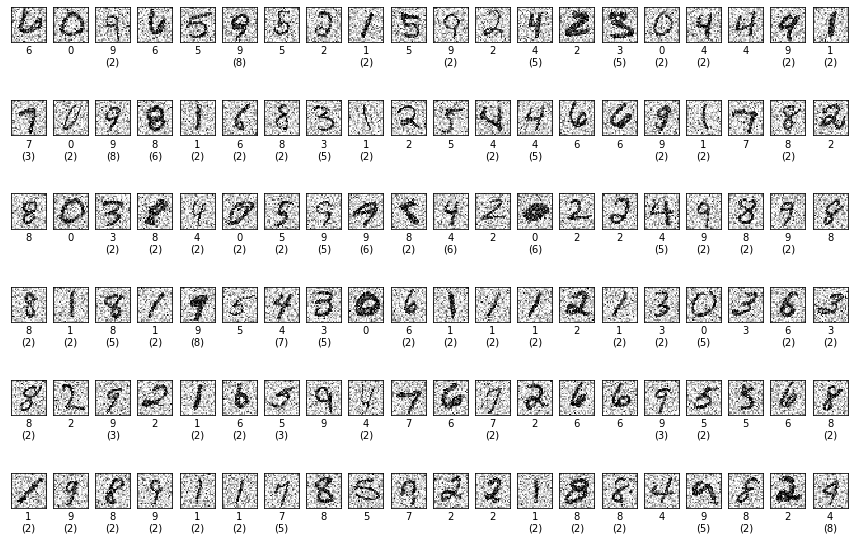

In [ ]:
#show first N=RxC test images
R =  6
C = 20
print( 'first ' + str(R*C) + ' test images (errors in parens)' )
plt.figure( figsize=(15, 10), num='first ' + str(R*C) + ' test images' )
plt.title( 'test images' )
for i in range( R*C ):
    img = noisy_test_sets[9][i]
    img = ( np.expand_dims(img, 0) )
    prediction = model.predict( img )
    prediction = class_names[ np.argmax(prediction[0]) ]
    plt.subplot( R, C, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( noisy_display_sets[9][i], cmap=plt.cm.binary, interpolation='nearest' )
    if class_names[int(test_labels[i])] == prediction:
        plt.xlabel( class_names[int(test_labels[i])] )
    else:
        plt.xlabel( class_names[int(test_labels[i])] + "\n(" + prediction + ")" )
plt.savefig( out_file+'-first120.png' )
plt.show()

**Display Noisy Images at the Maximum Noise Level**

---

Many of the images are completely illegible

first 120 test images (errors in parens)


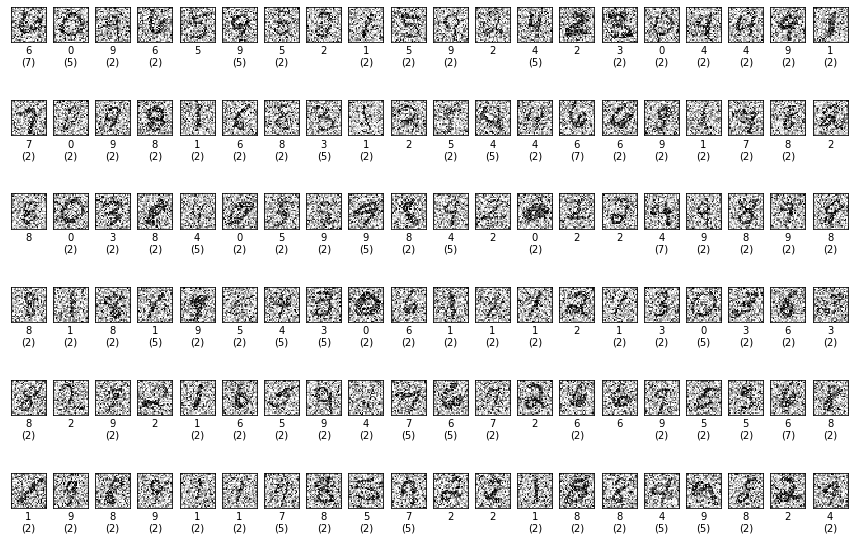

In [ ]:
#show first N=RxC test images
R =  6
C = 20
print( 'first ' + str(R*C) + ' test images (errors in parens)' )
plt.figure( figsize=(15, 10), num='first ' + str(R*C) + ' test images' )
plt.title( 'test images' )
for i in range( R*C ):
    img = noisy_test_sets[20][i]
    img = ( np.expand_dims(img, 0) )
    prediction = model.predict( img )
    prediction = class_names[ np.argmax(prediction[0]) ]
    plt.subplot( R, C, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( noisy_display_sets[19][i], cmap=plt.cm.binary, interpolation='nearest' )
    if class_names[int(test_labels[i])] == prediction:
        plt.xlabel( class_names[int(test_labels[i])] )
    else:
        plt.xlabel( class_names[int(test_labels[i])] + "\n(" + prediction + ")" )
plt.savefig( out_file+'-first120.png' )
plt.show()

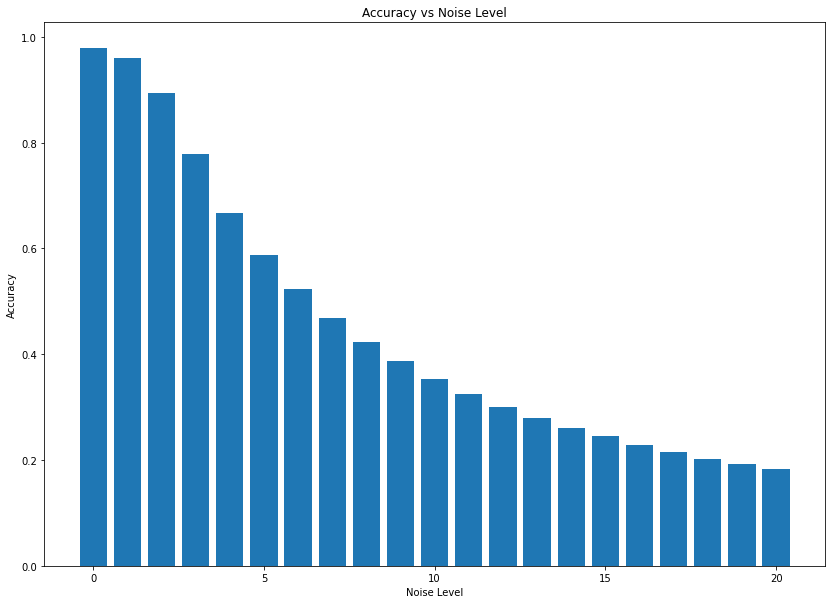

In [ ]:
plt.figure( figsize=(14,10) )
plt.title( 'Accuracy vs Noise Level' )
plt.bar( np.arange(0, 21), noise_accuracy_scores )
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.show()

# Increase Depth of Neural Network

---

Problem #5 in the assignment

In [ ]:
deep_model = keras.Sequential()
deep_model.add( keras.layers.Flatten( input_shape=input_shape) )
deep_model.add( keras.layers.Dense( 128, activation='relu') )
deep_model.add( keras.layers.Dense( 64, activation='relu') )
deep_model.add( keras.layers.Dense( 32, activation='relu') )
deep_model.add( keras.layers.Dense( len(class_names), activation='softmax' ) )
deep_model.compile( optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] )

In [ ]:
ep = 100
start_2 = time()
h = deep_model.fit( x_train, y_train, epochs=ep, callbacks=[tensorboard_callback], validation_data=(x_test, y_test))  #randomizes by default
elapsed_training_time_deep = time() - start_2

Epoch 1/100
1750/1750 [==============================] - 5s 3ms/step - loss: 0.4699 - accuracy: 0.8598 - val_loss: 0.1402 - val_accuracy: 0.9564
Epoch 2/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.1102 - accuracy: 0.9650 - val_loss: 0.0963 - val_accuracy: 0.9724
Epoch 3/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0723 - accuracy: 0.9774 - val_loss: 0.0862 - val_accuracy: 0.9752
Epoch 4/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0571 - accuracy: 0.9821 - val_loss: 0.0924 - val_accuracy: 0.9736
Epoch 5/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0477 - accuracy: 0.9851 - val_loss: 0.0949 - val_accuracy: 0.9745
Epoch 6/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0340 - accuracy: 0.9889 - val_loss: 0.0928 - val_accuracy: 0.9759
Epoch 7/100
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.0913 - val_ac

In [ ]:
model.save('digits_deep.h5')

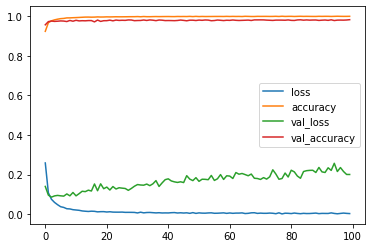

In [ ]:
pd.DataFrame(deep_model.history.history).plot()

In [ ]:
print(elapsed_training_time_deep)

408.9508545398712


In [ ]:
noise_accuracy_scores_deep = list()
noisy_predictions_deep = list()
noisy_classification_data_deep = list()

for test_set in noisy_test_sets:
  pred = np.argmax(deep_model.predict(test_set), axis=-1)
  noise_accuracy_scores_deep.append(accuracy_score(y_test, pred))
  noisy_classification_data_deep.append(classification_report(y_test, pred))
  noisy_predictions_deep.append(pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(noisy_classification_data_deep[0])

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1348
           1       1.00      0.99      0.99      1574
           2       0.98      0.98      0.98      1444
           3       0.97      0.98      0.98      1417
           4       0.98      0.98      0.98      1350
           5       0.98      0.98      0.98      1232
           6       0.99      0.98      0.99      1393
           7       0.98      0.99      0.98      1379
           8       0.97      0.98      0.97      1437
           9       0.98      0.97      0.98      1426

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



In [ ]:
print(noise_accuracy_scores_deep)

[0.9806428571428571, 0.9767857142857143, 0.955, 0.8968571428571429, 0.8307857142857142, 0.7677857142857143, 0.7131428571428572, 0.6628571428571428, 0.6157857142857143, 0.5742142857142857, 0.5324285714285715, 0.49814285714285716, 0.46435714285714286, 0.43264285714285716, 0.4080714285714286, 0.3877857142857143, 0.36392857142857143, 0.34564285714285714, 0.32721428571428574, 0.31064285714285716, 0.30057142857142854]


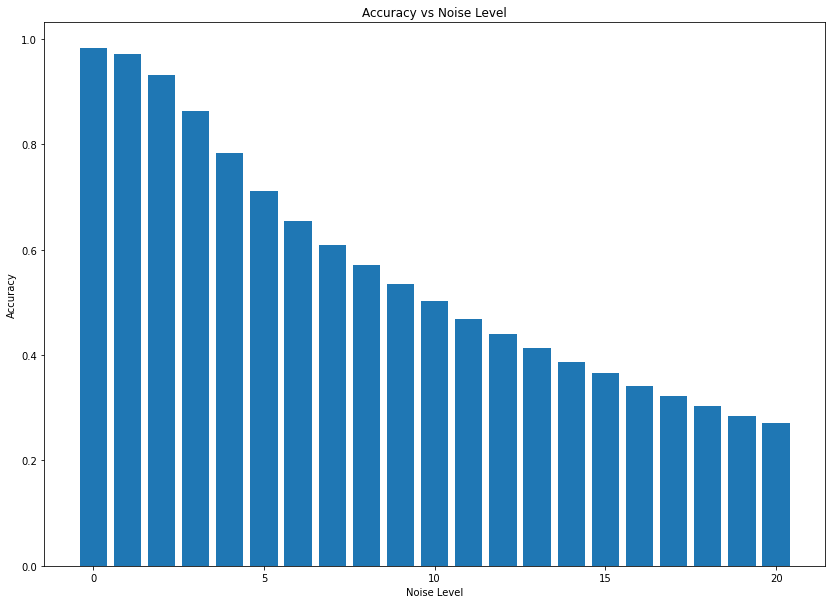

In [ ]:
plt.figure( figsize=(14,10) )
plt.title( 'Accuracy vs Noise Level' )
plt.bar( np.arange(0, 21), noise_accuracy_scores_deep )
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.show()

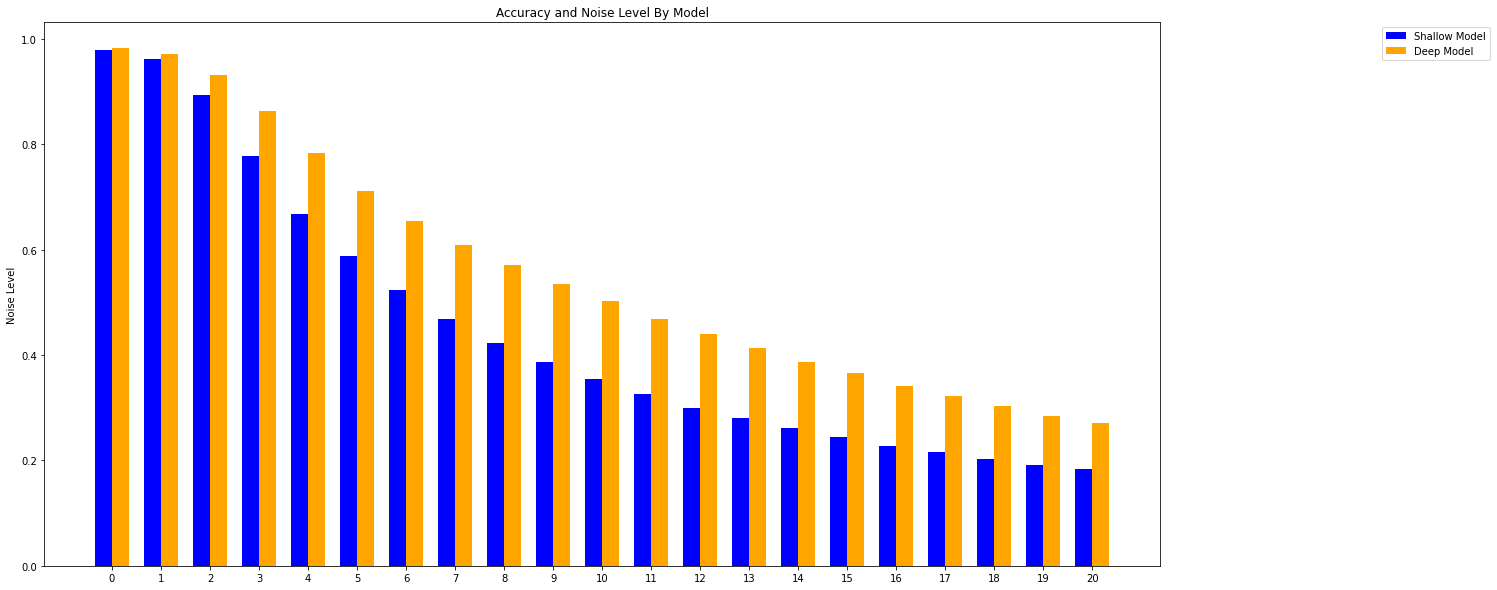

In [ ]:
labels = np.arange(0, 21)

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, noise_accuracy_scores, width, label='Shallow Model', color='blue')
rects2 = ax.bar(x + width/2, noise_accuracy_scores_deep, width, label='Deep Model', color='orange')

ax.set_ylabel('Accuracy')
ax.set_ylabel('Noise Level')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')
plt.title('Accuracy and Noise Level By Model')
plt.show()

In [ ]:
conv_model = keras.models.Sequential([
                                      keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=input_shape),
                                      keras.layers.MaxPooling2D(2),
                                      keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
                                      keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
                                      keras.layers.MaxPooling2D(2),
                                      keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
                                      keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
                                      keras.layers.MaxPooling2D(2),
                                      keras.layers.Flatten(),
                                      keras.layers.Dense(128, activation='relu'),
                                      keras.layers.Dropout(0.5),
                                      keras.layers.Dense(64, activation='relu'),
                                      keras.layers.Dropout(0.5),
                                      keras.layers.Dense( len(class_names), activation='softmax' )
])
conv_model.compile( optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] )

In [ ]:
ep = 100
start_3 = time()
h = conv_model.fit( x_train, y_train, epochs=ep)
elapsed_training_time_conv = time() - start_3

Epoch 1/100
1750/1750 [==============================] - 43s 6ms/step - loss: 0.8626 - accuracy: 0.6980
Epoch 2/100
1750/1750 [==============================] - 10s 6ms/step - loss: 0.1261 - accuracy: 0.9701
Epoch 3/100
1750/1750 [==============================] - 10s 6ms/step - loss: 0.0849 - accuracy: 0.9806
Epoch 4/100
1750/1750 [==============================] - 11s 6ms/step - loss: 0.0694 - accuracy: 0.9843
Epoch 5/100
1750/1750 [==============================] - 11s 6ms/step - loss: 0.0565 - accuracy: 0.9869
Epoch 6/100
1750/1750 [==============================] - 10s 6ms/step - loss: 0.0560 - accuracy: 0.9890
Epoch 7/100
1750/1750 [==============================] - 10s 6ms/step - loss: 0.0376 - accuracy: 0.9911
Epoch 8/100
1750/1750 [==============================] - 10s 6ms/step - loss: 0.0448 - accuracy: 0.9898
Epoch 9/100
1750/1750 [==============================] - 10s 6ms/step - loss: 0.0428 - accuracy: 0.9900
Epoch 10/100
1750/1750 [==============================] - 10s 6m

In [ ]:
print(elapsed_training_time_conv)

1075.3105273246765


In [ ]:
noise_accuracy_scores_conv = list()
noisy_predictions_conv = list()

for test_set in noisy_test_sets:
  pred = np.argmax(conv_model.predict(test_set), axis=-1)
  noise_accuracy_scores_conv.append(accuracy_score(y_test, pred))
  noisy_predictions_conv.append(pred)

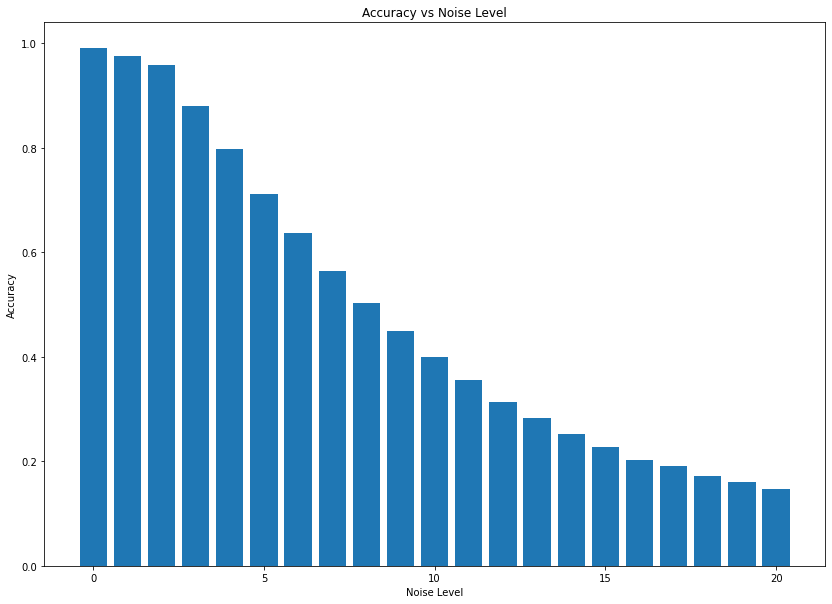

In [ ]:
plt.figure( figsize=(14,10) )
plt.title( 'Accuracy vs Noise Level' )
plt.bar( np.arange(0, 21), noise_accuracy_scores_conv)
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.show()